In [7]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [3]:
def cost_fn(theta,X,y):
  m = len(y)
  h = sigmoid(X.dot(theta))
  cost = -(1/m)*(y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
  return cost

In [4]:
def gradient(theta,X,y):
  m = len(y)
  h = sigmoid(X.dot(theta))
  grad = (1/m)*X.T.dot(h-y)
  return grad


In [13]:
data = pd.read_csv('data.csv')
data.drop('User ID', axis=1, inplace=True)
data.drop('Gender', axis=1, inplace=True)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X = np.array(X, dtype=float)
y = np.array(y, dtype=int)
#  intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [14]:
initial_theta = np.zeros(X.shape[1])

result = minimize(
    fun=cost_fn,
    x0=initial_theta,
    args=(X, y),
    method='BFGS',
    jac=gradient
)
optimal_theta = result.x

<ipython-input-2-36c2be795127>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-3-ae422d810b27>:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*(y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
<ipython-input-2-36c2be795127>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-3-ae422d810b27>:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*(y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))


In [15]:
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(10, 6))

    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='blue', label='Class 0', alpha=0.6)
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='red', label='Class 1', alpha=0.6)

    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = sigmoid(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()] @ theta)
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='green')

    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

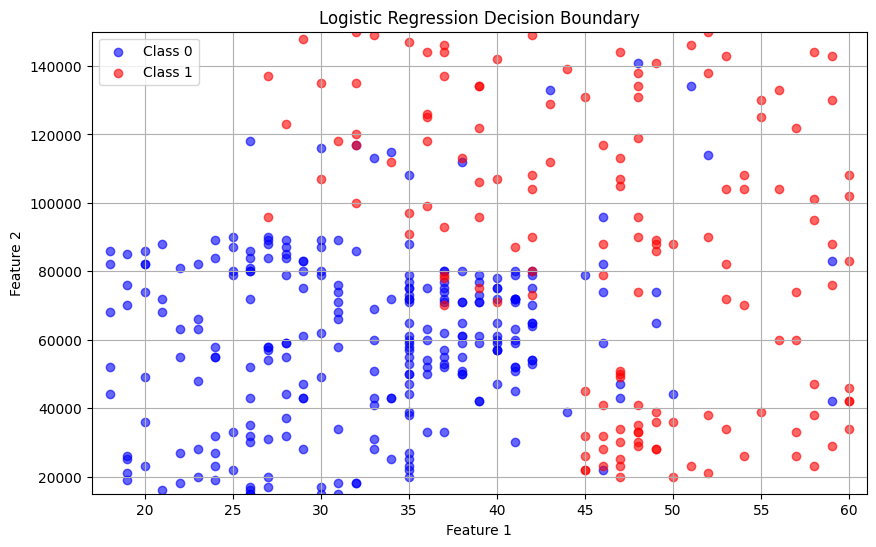

In [16]:
plot_decision_boundary(X, y, optimal_theta)